In [9]:
from func_def import *
df = pd.read_csv('data_pre_processed.csv',index_col=[0]).reset_index(drop=True)
df.tail(3)

,url,event_url,date,result,fighter,opponent,title,method,round,time,format,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc
7259,http://www.ufcstats.com/fight-details/59861c3d...,http://www.ufcstats.com/event-details/fc9a9559...,2020-02-29 00:00:00,W,Jordan Griffin,TJ Brown,Featherweight Bout,Submission,2,3:38,3 Rnd (5-5-5),13of21,2of2,0of0,9of17,3of3,3of3,26of39,6of7,0of1,9of22,10of10,13of15,0.86,0.13,0.00,0.60,0.20,0.20,0.81,0.18,0.00,0.28,0.31,0.4
7260,http://www.ufcstats.com/fight-details/0bcb0416...,http://www.ufcstats.com/event-details/fc9a9559...,2020-02-29 00:00:00,L,Aalon Cru,Spike Carlyle,Featherweight Bout,KO/TKO,1,1:25,3 Rnd (5-5-5),2of4,0of4,0of4,2of12,0of0,0of0,19of27,0of1,1of1,2of6,4of5,14of18,1.00,0.00,0.00,1.00,0.00,0.00,0.95,0.00,0.05,0.10,0.20,0.7
7261,http://www.ufcstats.com/fight-details/533d0b5c...,http://www.ufcstats.com/event-details/fc9a9559...,2020-02-29 00:00:00,W,Sean Brad,Ismail Naurdiev,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),30of71,3of3,14of17,32of73,1of1,14of17,16of64,10of10,11of13,33of79,4of8,0of0,0.63,0.06,0.29,0.68,0.02,0.29,0.43,0.27,0.29,0.89,0.10,0.0


In [10]:
df.result.value_counts()

W     4652
L     2478
NC      77
D       55
Name: result, dtype: int64

In [12]:
# need W & L to be about the same amount = dont want biased model
for i in tqdm(range(len(df))):
    if random() > 0.5:
        df.loc[i] = get_switched_row(index=i,data=df)

df.result.value_counts()        

100%|██████████| 7262/7262 [00:24<00:00, 290.50it/s]


W     3585
L     3545
NC      77
D       55
Name: result, dtype: int64

In [15]:
# Extract features
FEATURES = [item[item.find('_')+1:] for item in df.columns if 'f_' in item]

FULL_FEATURE_NAME = [f'f_{item}' for item in FEATURES] + [f'o_{item}' for item in FEATURES]
print(f'Constructing Features: {FEATURES}')

drop_columns = []
for column in FULL_FEATURE_NAME:
    if type(df.loc[0,column]) == str:
        drop_columns.append(column)
        df[f'{column}_succ'] = pd.to_numeric([item.split('of')[0] for item in df[column]])
        df[f'{column}_att'] = pd.to_numeric([item.split('of')[1] for item in df[column]])

df = df[[column for column in df.columns if column not in drop_columns]]
df.head(3)

Constructing Features: ['head_str_perc', 'body_str_perc', 'leg_str_perc', 'dist_str_perc', 'clinch_str_perc', 'ground_str_perc', 'head_str_succ', 'head_str_att', 'body_str_succ', 'body_str_att', 'leg_str_succ', 'leg_str_att', 'distance_str_succ', 'distance_str_att', 'clinch_str_succ', 'clinch_str_att', 'ground_str_succ', 'ground_str_att', 'win_perc', 'current_win_streak', 'current_lose_streak']


,url,event_url,date,result,fighter,opponent,title,method,round,time,format,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att,f_win_perc,o_win_perc,f_current_win_streak,o_current_win_streak,f_current_lose_streak,o_current_lose_streak
0,http://www.ufcstats.com/fight-details/1aa4c2fa...,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),0.33,0.34,0.33,0.33,0.34,0.33,1.00,0.00,0.00,0.14,0.00,0.85,0,6,0,0,0,0,0,6,0,0,0,0,7,10,0,0,0,1,1,4,0,0,6,7,0.333333,0.272727,0,1,1,0
1,http://www.ufcstats.com/fight-details/e966de63...,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,W,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,2,2:05,3 Rnd (5-5-5),0.57,0.34,0.07,0.92,0.07,0.00,0.36,0.18,0.45,1.00,0.00,0.00,15,47,9,12,2,3,24,60,2,2,0,0,4,15,2,3,5,10,11,27,0,1,0,0,1.000000,0.181818,2,1,0,0
2,http://www.ufcstats.com/fight-details/eb76a5b7...,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),0.72,0.25,0.02,0.92,0.07,0.00,0.60,0.35,0.04,0.80,0.02,0.16,29,122,10,17,1,2,37,133,3,8,0,0,41,134,24,36,3,6,55,141,2,9,11,26,0.333333,0.400000,1,0,0,3


In [16]:
# data enrichments 
NEW_DATA_COLUMNS = ['win_perc','current_win_streak','current_lose_streak']
for column in NEW_DATA_COLUMNS:
    if column == 'win_perc':
        df[f'f_{column}'] = [get_win_perc(fighter=df.loc[i,'fighter'],time=df.loc[i,'date'],data=df) for i in tqdm(range(len(df)))]
        df[f'o_{column}'] = [get_win_perc(fighter=df.loc[i,'opponent'],time=df.loc[i,'date'],data=df) for i in tqdm(range(len(df)))]
    elif column == 'current_win_streak':    
        df[f'f_{column}'] = [get_win_streak(fighter=df.loc[i,'fighter'],time=df.loc[i,'date'],data=df) for i in tqdm(range(len(df)))]
        df[f'o_{column}'] = [get_win_streak(fighter=df.loc[i,'opponent'],time=df.loc[i,'date'],data=df) for i in tqdm(range(len(df)))]
    elif column == 'current_lose_streak':    
        df[f'f_{column}'] = [get_lose_streak(fighter=df.loc[i,'fighter'],time=df.loc[i,'date'],data=df) for i in tqdm(range(len(df)))]
        df[f'o_{column}'] = [get_lose_streak(fighter=df.loc[i,'opponent'],time=df.loc[i,'date'],data=df) for i in tqdm(range(len(df)))]    

df.head(3)       

100%|██████████| 7262/7262 [00:29<00:00, 245.79it/s]


,url,event_url,date,result,fighter,opponent,title,method,round,time,format,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att,f_win_perc,o_win_perc,f_current_win_streak,o_current_win_streak,f_current_lose_streak,o_current_lose_streak
0,http://www.ufcstats.com/fight-details/1aa4c2fa...,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),0.33,0.34,0.33,0.33,0.34,0.33,1.00,0.00,0.00,0.14,0.00,0.85,0,6,0,0,0,0,0,6,0,0,0,0,7,10,0,0,0,1,1,4,0,0,6,7,0.333333,0.272727,0,1,1,0
1,http://www.ufcstats.com/fight-details/e966de63...,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,W,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,2,2:05,3 Rnd (5-5-5),0.57,0.34,0.07,0.92,0.07,0.00,0.36,0.18,0.45,1.00,0.00,0.00,15,47,9,12,2,3,24,60,2,2,0,0,4,15,2,3,5,10,11,27,0,1,0,0,1.000000,0.181818,2,1,0,0
2,http://www.ufcstats.com/fight-details/eb76a5b7...,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),0.72,0.25,0.02,0.92,0.07,0.00,0.60,0.35,0.04,0.80,0.02,0.16,29,122,10,17,1,2,37,133,3,8,0,0,41,134,24,36,3,6,55,141,2,9,11,26,0.333333,0.400000,1,0,0,3


<AxesSubplot:xlabel='result', ylabel='f_head_str_att'>

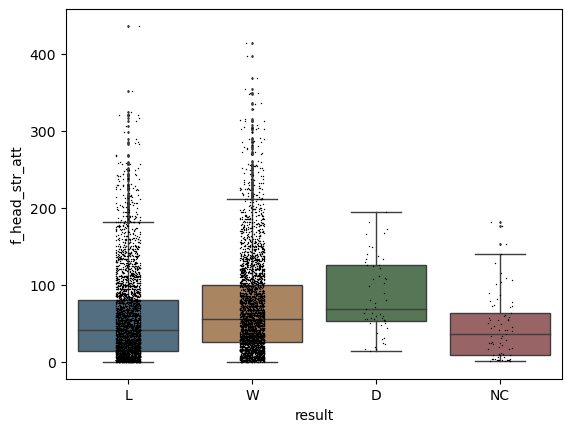

In [17]:
# Visualize STAT effect:
SELECTED_FEATURE = 'f_head_str_att'
sns.boxplot(x='result',y=SELECTED_FEATURE,data=df,saturation=0.3,linewidth=1,fliersize=1)
sns.stripplot(x='result',y=SELECTED_FEATURE,data=df,size=1,jitter=True,color='black')

In [18]:
df.to_csv('data_processed.csv',index=None)
print('data_processed.csv saved.')
df.info()

data_processed.csv saved.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    7262 non-null   object 
 1   event_url              7262 non-null   object 
 2   date                   7262 non-null   object 
 3   result                 7262 non-null   object 
 4   fighter                7262 non-null   object 
 5   opponent               7262 non-null   object 
 6   title                  7262 non-null   object 
 7   method                 7262 non-null   object 
 8   round                  7262 non-null   int64  
 9   time                   7262 non-null   object 
 10  format                 7262 non-null   object 
 11  f_head_str_perc        7262 non-null   float64
 12  f_body_str_perc        7262 non-null   float64
 13  f_leg_str_perc         7262 non-null   float64
 14  f_dist_str_perc        7262 no